In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [17]:
a1=10
a2=10
b=2
g=2
s=[]
def myFunction(z):
   u = z[0]
   v = z[1]
   

   F = np.empty((2))
   F[0] = a1/(1+v**b) - u
   F[1] = a2/(1+u**g) - v
   
   return F

def J(u,v):
    j=[[-1, (-a1*b*v**(b-1))/(1+v**b)**2], [(-a2*g*u**(g-1))/(1+u**g)**2,-1]]
    #print(j)
    
    return j

for i in range(10):
    for j in range(10):
        zGuess=[i,j]
        z=fsolve(myFunction,zGuess,full_output=True,xtol=10**-20)
        x=[np.around(z[0][0],decimals=10),np.around(z[0][1],decimals=10)]
        s.append(tuple(x))
S=list(set(s))

x=[]
for s in S:
    x.append(J(s[0],s[1]))#apply J to each tuple in S
#print(x)
a=[]
for i in x:
    v=np.linalg.eigvals(i)
    a.append(v)
    #print(v)
a=np.array(a)

#print(a)

c=[]
def bool(a,c):
    for aa in a:
        if aa[0]<0 and aa[1]<0:
            c.append(1)#stable
        else:
            c.append(0)#unstable
    print(c)
bool(a,c)
print(S)
#stable if all the element has neg real part

[1, 1, 0]
[(0.1010205144, 9.8989794856), (9.8989794856, 0.1010205144), (2.0, 2.0)]


In [20]:
# function with input = values of a1 and a2
#output is true/false checking eigenvalue signs
def bif(a1,a2):
    alpha1=a1
    alpha2=a2
    def myFunction(z):
       u = z[0]
       v = z[1]


       F = np.empty((2))
       F[0] = a1/(1+v**b) - u
       F[1] = a2/(1+u**g) - v

       return F

    def J(u,v):
        j=[[-1, (-a1*b*v**(b-1))/(1+v**b)**2], [(-a2*g*u**(g-1))/(1+u**g)**2,-1]]
        #print(j)

        return j
    s=[]
    for i in range(10):
        for j in range(10):
            zGuess=[i,j]
            z=fsolve(myFunction,zGuess,full_output=True,xtol=10**-20)
            x=[np.around(z[0][0],decimals=2),np.around(z[0][1],decimals=2)]
            s.append(tuple(x))
    S=list(set(s))

    x=[]
    for s in S:
        x.append(J(s[0],s[1]))#apply J to each tuple in S
    #print(x)
    eig=[]
    for i in x:
        v=np.linalg.eigvals(i)
        eig.append(v)
        #print(v)
    eig=np.array(eig)
    #example eig: [-0.7 -0.23]
    print(eig)
#negative realpart means stable
    c=[]
    def bool(a,c):
        for aa in eig:
            for aaa in aa:
                if aaa>0:
                    return 0
        return 1
    return bool(a,c)

print(bif(2,3))

[[-1.80025169e-03 -1.99819975e+00]
 [-4.43957966e-04 -1.99955604e+00]
 [-5.96215905e-01 -1.40378410e+00]
 [ 4.08191601e-03 -2.00408192e+00]]
0


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


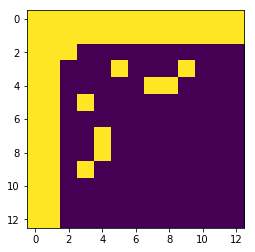

In [12]:
# bifurcation
alphas1=np.array(range(13))
alphas2=np.array(range(13))

row=[]
bifmatrix=[]
for a1 in alphas1:
    for a2 in alphas2:
        row.append(bif(a1,a2))
        
    bifmatrix.append(row)
    row=[]
    
plt.imshow(bifmatrix)
print(bifmatrix)